First, import the libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# To remove unwanted warnings
import warnings
warnings.filterwarnings("ignore")

Let's import the sklearn library that will be used for machine learning.

In [ ]:
import sklearn

Then we load the Breast Cancer data set from sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer

Let's take a quick look about description of the data

In [ ]:
data1 = load_breast_cancer()
print(data1.DESCR[:760]) # Print the short description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


Let's see what are the target classes of types of the cancer.

In [ ]:
# show types of breast cancer
print(f"Types of cancer (targets) are {data1.target_names}")

Types of cancer (targets) are ['malignant' 'benign']


What is the dimension of data? We see there are 569 examples and each example has 30 features.
The target variable is binary (0 and 1 for malignant and benign).

We will consider benign as positive class, and malignant as negative class.

We can understand it as:
0 for is_not_benign
1 for is_benign

In [ ]:
X = data1.data  # features
y = data1.target  # labels
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")

Shape of features is (569, 30), and shape of target is (569,)


Now, we split the data into two(2) sets which are Train data and Test Data to check later on whether or not our K-Nearest Neighbour Classifier Model for Breast Cancer (Diagnostic) Data Set works correctly.

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [ ]:
from sklearn.model_selection import train_test_split

# All the measurement (features) are considered as X and the Diagnosis considered as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200,
                                                    random_state=42,
                                                    stratify=y)
# for a test data set for 2 types Breast Cancer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
y_train[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (369, 30) (369,)
Test set: (200, 30) (200,)


Sklearn is used to split the data. The specified test size of the data set is 0.3 according to the above code segment. Therefore, 30% of data is split into the test, and the remaining 70% is used to train the model.

Let's classify the data to nearest data point and identify types of cancer.

In [ ]:
# Instantiate learning model (k=4)
knn = KNeighborsClassifier(n_neighbors=4)

It trains quite fast since we are working with relatively small dataset.

In [ ]:
# Fitting the model with training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Before predict the result, it is possible to have estimate mean accuracy on the given test data and labels,

In [ ]:
knn.score(X_test, y_test)

0.92

Now save the prediction results both as probability and as classes.
y_preds is a 1D vector of one of {0, 1} values, denoting predictions as malignant and benign, respectively.

y_proba is a 2D vector,
where for each example, it contains a vector of length 2,

[prob. of malignant, prob. of benign]

In [ ]:
y_preds = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)

We need to reshape y_proba to a 1D vector denoting the probability of having benign cancer.

In [ ]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [ ]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([1., 0., 1., 1., 1.]), array([1, 0, 1, 1, 1]), array([1, 0, 1, 1, 1]))

Now we want to calculate confusion matrix of the predictions and model accuracy. It is implemented in Scikit-learn's.


For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[ 67,   8],
       [  8, 117]])

Text(0.5, 12.5, 'Predicted label')

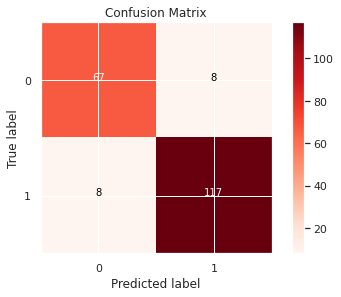

In [ ]:
classes = [0, 1]

# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
import itertools
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# Calculate the model accuracy
accuracy = accuracy_score(y_test, y_preds)*100
print('Accuracy of the model is equal ' + str(round(accuracy, 2)) + '%.')

Accuracy of the model is equal 92.0%.


From the confusion matrix, we can see the number of examples predicted correct by our classifier, for both classes seperately.
We can get the numbers of True Positives, True Negatives, False Positives, and False Negatives from this confusion matrix.
Lets store these terms in some variables.

In [ ]:
# from the confusion matrix
TP = true_pos = 117
TN = true_neg = 67
FP = false_pos = 8
FN = false_neg = 8

Now, we will calculate some basic metrics from these four values.
We will need a dictionary to store these metrics. Lets create a dictionary results.

In [ ]:
results = {}

Accuracy = number of examples correctly predicted / total number of examples

Accuracy = (TP+TN) / (TP+FP+FN+TN)

In [ ]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .2f}")

ACC is  0.92


True Positive Rate

Sensitivity or Recall = number of samples actually and predicted as Positive / total number of samples actually Positive

Sensitivity or Recall = TP/P = TP/(TP+FN)



In [ ]:
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .2f}")

TPR is  0.94


True Negative Rate

Specificity = number of samples actually and predicted as Negative / total number of samples actually Negative

Specificity = TN/N = TN/(TN+FP)

In [ ]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .2f}")

TNR is  0.89


Positive Predictive Value

Precision = number of samples actually and predicted as Positive / total number of samples predicted as Positive

Precision = TP/(TP+FP)

In [ ]:
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .2f}")

PPV is  0.94


Negative Predictive Value

Precision = number of samples actually and predicted as Negative / total number of samples predicted as Negative

Precision = TN/(TN+FN)

In [ ]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .2f}")

NPV is  0.89


F1 score

Harmonic Mean of Precision and Recall.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [ ]:
metric = "F1 Score"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .2f}")

F1 Score is  0.94


In [ ]:
# Show the classification report
# 0 = malignant
# 1 = benign
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        75
           1       0.94      0.94      0.94       125

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



The results show that our KNN algorithm was able to classify all the 200 records in the test set with 92% accuracy, which is not perfect. Although the algorithm performed well with this dataset, don't expect the same results with all applications because KNN doesn't always perform as well with high-dimensionality or categorical features.

Let's try to use the cross-validation for parameter tuning to help us know which value yields the best results. We will plot the graph of K value and the corresponding error rate for the data set.

In [ ]:
neighbors = [] # Empty list to store neighbors
cv_scores = [] # Empty list to store scores

# To perform 10-fold cross validation
for k in range(1, 51):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

# Passing the entire of X and y, not X_train or y_train, it takes split data
# cv=10 for 10 folds
#Scoring = 'accuarcy' for evaluation metric

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.89473684 0.84210526 0.9122807  0.94736842 0.92982456 0.92982456
 0.94736842 0.94736842 0.92982456 0.92857143]


Next we plot the misclassification error over the number of K neighbors to determine the optimal K value which provides the highest accuracy score.

The process is done by using following code segment.

The optimal number of K neighbors = 6


<Figure size 432x288 with 0 Axes>

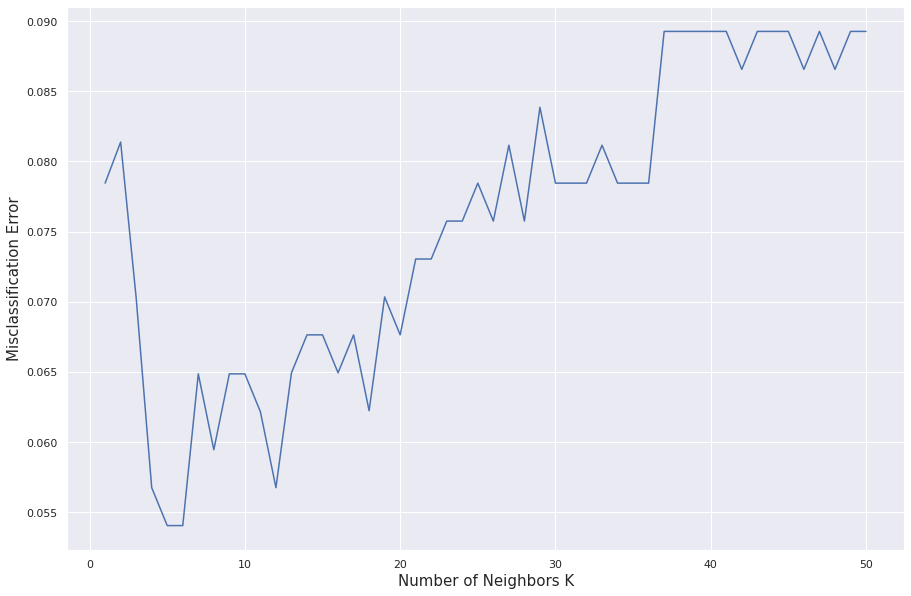

In [ ]:
# Misclassification error versus k
MSE = [1-x for x in cv_scores]

# Determine the best k value
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of K neighbors = %d'  %optimal_k)

plt.figure()
# Plot misclassification error versus k
plt.figure(figsize=(15,10))
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("darkgrid")
plt.plot(neighbors, MSE)
plt.show()

**ROC curve (Receiver Operating Characteristic curve)**

A receiver operating characteristic curve, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

Let's plot the ROC curve for the Breast Cancer Dataset.



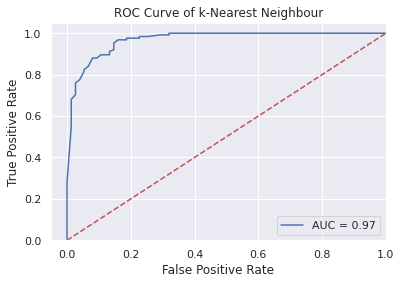

In [ ]:
knn.fit(X_train, y_train)
y_proba = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', label="Mean")
plt.xlim([-0.05, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of k-Nearest Neighbour')
plt.show()

The peak towards left-most corner means near perfect classifier, while random prediction will have the curve as the blue dotted straight line. This ROC curve tells us that our model is nearly perfect classifier, with high accuracy.

Now, calculate an ROC curve with random predictions, and plot it to see the difference.

In [ ]:
# create random predictions
rand_proba = np.random.random(size=(y_proba.shape))
rand_proba[:4]  # 0.5 probability of being 0 or 1

array([[0.10312387, 0.90255291],
       [0.50525237, 0.82645747],
       [0.3200496 , 0.89552323],
       [0.38920168, 0.01083765]])

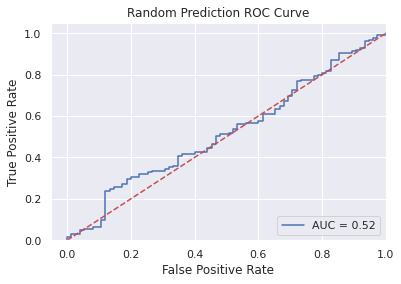

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, rand_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', label="Mean")
plt.xlim([-0.05, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Prediction ROC Curve')
plt.show()

As we can see from the above plot, random predictions give the ROC curve nearly at the mean. Contrast it with the previous curve, how our model has top left peak, due to its superior performance.

Compare the similiarity of these curve's to the ROC curve with scikit's implementation.

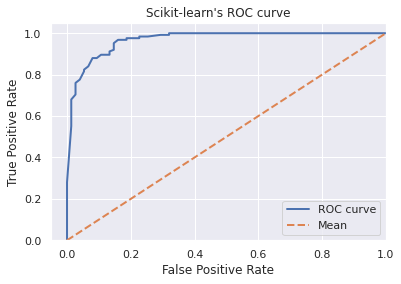

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba[:, 1])
# Plot the ROC curve
plt.plot(fpr, tpr,
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

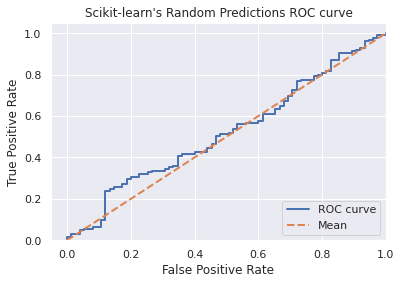

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, rand_proba[:, 1]) #passing random prediction

# Plot the ROC Curve
plt.plot(fpr, tpr,
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1],  lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's Random Predictions ROC curve")
plt.legend(loc="lower right")
plt.show()

**ROC-AUC Score**

Now that, we know about ROC Curve, that represent AUC score. AUC stands for Area under the Curve, which is nothing but the area under the ROC curve formed by the predictions.